# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500) 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/gold_recovery_train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/gold_recovery_test.csv')
df_full = pd.read_csv('/content/drive/My Drive/Colab Notebooks/gold_recovery_full.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [8]:
df_full.duplicated().sum()

0

##### Выводы:
1. Дубликаты отстутствуют.
2. Есть пропущенные значения во всех датафреймах.

### Новая переменная для расчёта MAE.

In [9]:
df_train_mae = df_train.dropna().copy()

### Функция по расчёту Recovery.

In [10]:
def recovery(c,f,t):
    try:
        result = (c*(f-t))/(f*(c-t))
        if result < 0:
            return 0
        else:
            return result
    except:
        return 0

### Расчёт Recovery.

In [11]:
#df_train_mae['rougher.output.recovery.calculated'] = abs((df_train_mae['rougher.output.concentrate_au']*(df_train_mae['rougher.input.feed_au']-df_train_mae['rougher.output.tail_au']))/(df_train_mae['rougher.input.feed_au']*(df_train_mae['rougher.output.concentrate_au']-df_train_mae['rougher.output.tail_au'])))
#с = df_train_mae['rougher.output.concentrate_au']
#f = df_train_mae['rougher.input.feed_au']
#t = df_train_mae['rougher.output.tail_au']
df_train_mae['rougher.output.recovery.calculated'] = df_train_mae.apply(lambda x: recovery(x['rougher.output.concentrate_au'],x['rougher.input.feed_au'],x['rougher.output.tail_au']), axis=1)

### Расчёт MAE.

In [12]:
print(mean_absolute_error(df_train_mae['rougher.output.recovery'], df_train_mae['rougher.output.recovery.calculated']*100))

9.555596961987514e-15


##### Вывод: значение MAE получилось очень низкое, можно сказать, равное нулю. Recovery было посчитано верно.

### Сравнение test и train выборок.

##### Разница в столбцах:

In [13]:
print(len(df_train.columns)-len(df_test.columns))

34


In [14]:
count=0
for i in sorted(set(df_train.columns) - set(df_test.columns)):
    count+=1
    print(i)
print(count)

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_au
secondary_cleaner.

##### Вывод: в тестовой выборке отсутствуют выходные (конечные) данные и некоторые расчётные параметры по каждому этапу технологического процесса. Все они относятся к типу output.

### Предобработка.

### Проверка количества пропущенных значений df_full.

In [15]:
df_full.isna().sum()

date                                                     0
final.output.concentrate_ag                             89
final.output.concentrate_pb                             87
final.output.concentrate_sol                           385
final.output.concentrate_au                             86
final.output.recovery                                 1963
final.output.tail_ag                                    83
final.output.tail_pb                                   200
final.output.tail_sol                                  271
final.output.tail_au                                    81
primary_cleaner.input.sulfate                         1609
primary_cleaner.input.depressant                      1546
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                        1151
primary_cleaner.output.concentrate_ag                   98
primary_cleaner.output.concentrate_pb                  448
primary_cleaner.output.concentrate_sol                 7

##### Итоги:
Заполняю значения в rougher.output.recovery по формуле. Остальное можно заполнить методом ffill.

### Заполняю пропущенные значения в 'rougher.output.recovery' по формуле.

In [16]:
df_full.loc[df_full['rougher.output.recovery'].isna(),'rougher.output.recovery'] = df_full.loc[df_full['rougher.output.recovery'].isna()].apply(lambda x: recovery(x['rougher.output.concentrate_au'],x['rougher.input.feed_au'],x['rougher.output.tail_au']), axis=1)

In [17]:
df_full['rougher.output.recovery'].isna().sum()

2737

### Проверка количества пропущенных значений df_train.

In [18]:
df_train.isna().sum()

date                                                     0
final.output.concentrate_ag                             72
final.output.concentrate_pb                             72
final.output.concentrate_sol                           370
final.output.concentrate_au                             71
final.output.recovery                                 1521
final.output.tail_ag                                    66
final.output.tail_pb                                   183
final.output.tail_sol                                  145
final.output.tail_au                                    66
primary_cleaner.input.sulfate                         1307
primary_cleaner.input.depressant                      1262
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         985
primary_cleaner.output.concentrate_ag                   82
primary_cleaner.output.concentrate_pb                  358
primary_cleaner.output.concentrate_sol                 6

##### Итоги:
rougher.output.recovery - 2573 пропущенных значений.  
Эти значения можно рассчитать и заполнить. Те, что не удаётся рассчитать - удаляем. 
Все NaN в других столбцах заполняем последним известным значением в столбце (.fillna(method = 'ffill'))

### Заполняю пропущенные значения в 'rougher.output.recovery' по формуле.

In [19]:
df_train.loc[df_train['rougher.output.recovery'].isna(),'rougher.output.recovery'] = df_train.loc[df_train['rougher.output.recovery'].isna()].apply(lambda x: recovery(x['rougher.output.concentrate_au'],x['rougher.input.feed_au'],x['rougher.output.tail_au']), axis=1)

In [20]:
df_train['rougher.output.recovery'].isna().sum()

2250

### Удаляю пропущенные значения в столбцах 'rougher.output.recovery' и 'final.output.recovery'.

In [21]:
df_train.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace = True) 

### Заполняю пропущенные значения в df_train.

In [22]:
df_train = df_train.fillna(method = 'ffill')

### Приведение в типу DateTime столбцов 'date' в трёх датафреймах.

In [23]:
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')

### Проверка количества пропущенных значений df_test.

In [24]:
df_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


##### Все NaN заполняем последним известным значением в столбце (.fillna(method = 'ffill'))

### Заполняю пропущенные значения в df_test.

In [25]:
df_test = df_test.fillna(method = 'ffill')

### Перенос целевых признаков из full в test.

In [26]:
df_test = df_test.merge(df_full[['date','rougher.output.recovery','final.output.recovery']],on='date', how='left')

### Удаляю пропущенные значения в столбцах 'rougher.output.recovery' и 'final.output.recovery'.

In [27]:
df_test.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace = True) 

### Создание датафрейма со столбцами, аналогичными test и подходящим для обучения.

In [28]:
df_to_train = df_train[[i for i in sorted(set(df_train.columns)&set(df_test.columns))]]

### Поскольку метрика sMAPE не работает с нулевыми значениями target и answers, удаляем все нулевые значения в столбцах 'rougher.output.recovery' и 'final.output.recovery' в df_to_train и df_test.

In [29]:
df_to_train = df_to_train.loc[(df_to_train['final.output.recovery']!=0)&(df_to_train['rougher.output.recovery']!=0)]

In [30]:
df_test = df_test.loc[(df_test['final.output.recovery']!=0)&(df_test['rougher.output.recovery']!=0)]

# 2. Анализ данных

### Создание массивов данных для построения графиков оценки изменения концентрации металлов на разных этапах очистки.

In [31]:
ag_median = pd.DataFrame({'output':[df_train['rougher.input.feed_ag'].median(),df_train['rougher.output.concentrate_ag'].median(),df_train['primary_cleaner.output.concentrate_ag'].median(),df_train['final.output.concentrate_ag'].median()],
                          'tails':[0,df_train['rougher.output.tail_ag'].median(),(df_train['primary_cleaner.output.tail_ag'].median()+df_train['secondary_cleaner.output.tail_ag'].median()),df_train['final.output.tail_ag'].median()],
                          'process':['rougher.input','rougher.output','primary_cleaner.output+secondary_cleaner','final.output']})
au_median = pd.DataFrame({'output':[df_train['rougher.input.feed_au'].median(),df_train['rougher.output.concentrate_au'].median(),df_train['primary_cleaner.output.concentrate_au'].median(),df_train['final.output.concentrate_au'].median()],
                          'tails':[0,df_train['rougher.output.tail_au'].median(),(df_train['primary_cleaner.output.tail_au'].median()+df_train['secondary_cleaner.output.tail_au'].median()),df_train['final.output.tail_au'].median()],
                          'process':['rougher.input','rougher.output','primary_cleaner.output+secondary_cleaner','final.output']})
pb_median = pd.DataFrame({'output':[df_train['rougher.input.feed_pb'].median(),df_train['rougher.output.concentrate_pb'].median(),df_train['primary_cleaner.output.concentrate_pb'].median(),df_train['final.output.concentrate_pb'].median()],
                          'tails':[0,df_train['rougher.output.tail_pb'].median(),(df_train['primary_cleaner.output.tail_pb'].median()+df_train['secondary_cleaner.output.tail_pb'].median()),df_train['final.output.tail_pb'].median()],
                          'process':['rougher.input','rougher.output','primary_cleaner.output+secondary_cleaner','final.output']})
sol_median = pd.DataFrame({'output':[df_train['rougher.input.feed_sol'].median(),df_train['rougher.output.concentrate_sol'].median(),df_train['primary_cleaner.output.concentrate_sol'].median(),df_train['final.output.concentrate_sol'].median()],
                          'tails':[0,df_train['rougher.output.tail_sol'].median(),(df_train['primary_cleaner.output.tail_sol'].median()+df_train['secondary_cleaner.output.tail_sol'].median()),df_train['final.output.tail_sol'].median()],
                          'process':['rougher.input','rougher.output','primary_cleaner.output+secondary_cleaner','final.output']})

### Построение графика изменения концентрации металлов на этапах очистки.

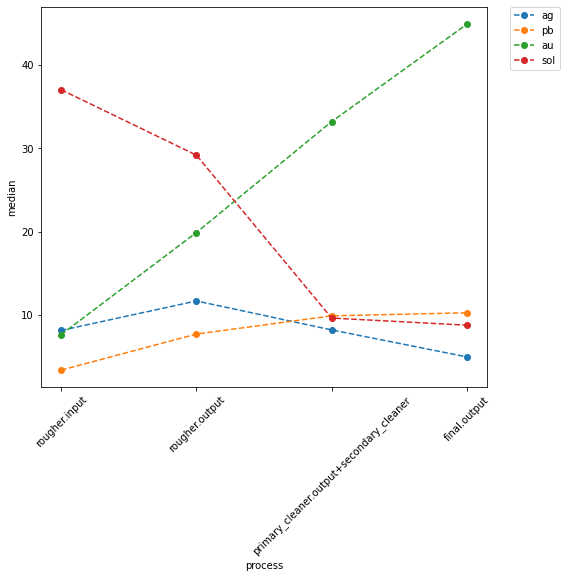

In [32]:
plt.figure(figsize=(8,7))
plt.plot(ag_median['process'], ag_median['output'],'--',marker='o',label="ag")
plt.plot(pb_median['process'], pb_median['output'],'--',marker='o',label="pb")
plt.plot(au_median['process'], au_median['output'],'--',marker='o',label="au")
plt.plot(sol_median['process'], sol_median['output'],'--',marker='o',label="sol")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.xlabel('process')
plt.ylabel('median')
plt.show()

##### Выводы:
    1. На графике видно, что доля золота в концентрате повышается с каждым этапом обработки.
    2. Доля примесей (sol) изначально была высокой и снижается на каждом этапе очистки.
    3. Происходит отсеивание серебра (ag) из концетрата.
    4. Доля свинца (pb) в концентрате незначительно повышается, скорее всего общее изначальное количество всё таки
    понизилось.
    5. На выходе получается, что доля каждого рассматриваемого вещества, кроме золота,
    не более 10, тогда как концентрация золота значительно увеличилась.
    6. Использованы медианные значения для каждого показателя.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


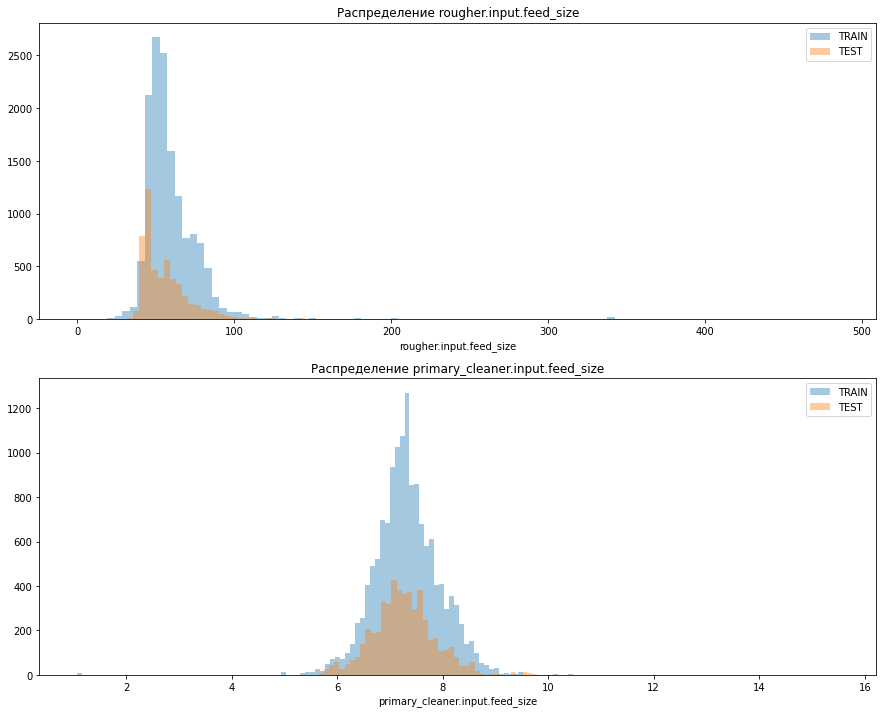

In [33]:
feed_sizes = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size', ]

feed_sizes_titles = ['Распределение rougher.input.feed_size',
                     'Распределение primary_cleaner.input.feed_size']

feed_sizes_legends = ['TRAIN', 'TEST']

fig, ax = plt.subplots(2,1, figsize=(15,12))

for i in range(2):
    a = sns.distplot(df_train[feed_sizes[i]], bins=100, kde=False,
                label = feed_sizes_legends[0], ax=ax[i])
    ax[i].legend()
    a = sns.distplot(df_test[feed_sizes[i]], bins=100, kde=False,
                label = feed_sizes_legends[1], ax=ax[i])
    ax[i].legend()
    a.set_title(feed_sizes_titles[i])

##### Выводы:
1. Распределения rougher.input.feed_size похожи на распределения Пуассона с разными размерами гранул на train и test.
Распределения не сильно отличаются.
2. Распределения primary_cleaner.input.feed_size похожи на нормальное, также, с разными размерами гранул на train и test.
Распределения не сильно отличаются.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах в train выборке.

In [34]:
concentrate = {
    '1':['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag'],
    '2':['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au'],
    '3':['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb'],
    '4':['rougher.input.feed_sol','rougher.output.concentrate_sol','primary_cleaner.output.concentrate_sol','final.output.concentrate_sol'],
}

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'final.output.concentrate')

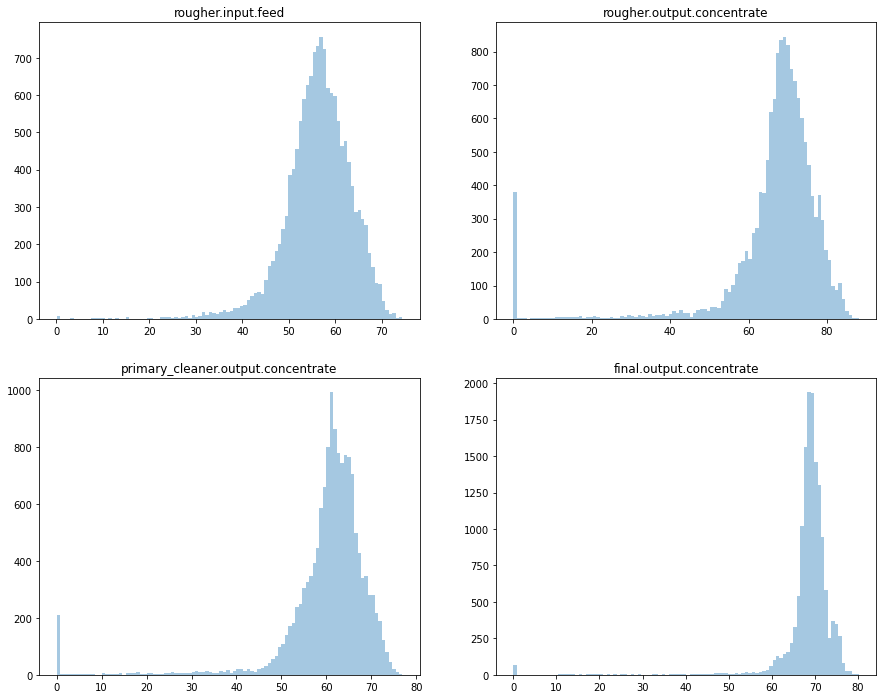

In [35]:
fig, ax = plt.subplots(2,2, figsize=(15,12))

set1 = df_train[concentrate['1'][0]]+df_train[concentrate['2'][0]]+df_train[concentrate['3'][0]]+df_train[concentrate['4'][0]]
ax1 = sns.distplot(set1, bins=100, kde=False, ax=ax[0,0])
ax1.set_title('rougher.input.feed')

set2 = df_train[concentrate['1'][1]]+df_train[concentrate['2'][1]]+df_train[concentrate['3'][1]]+df_train[concentrate['4'][1]]
ax2 = sns.distplot(set2, bins=100, label = i, kde=False, ax=ax[0,1])
ax2.set_title('rougher.output.concentrate')

set3 = df_train[concentrate['1'][2]]+df_train[concentrate['2'][2]]+df_train[concentrate['3'][2]]+df_train[concentrate['4'][2]]
ax3 = sns.distplot(set3, bins=100, kde=False, ax=ax[1,0])
ax3.set_title('primary_cleaner.output.concentrate')

set4 = df_train[concentrate['1'][3]]+df_train[concentrate['2'][3]]+df_train[concentrate['3'][3]]+df_train[concentrate['4'][3]]
ax4 = sns.distplot(set4, bins=100, label = i, kde=False, ax=ax[1,1])
ax4.set_title('final.output.concentrate')

##### Выводы:
1. На первом этапе 'rougher.input.concentrate' есть небольшое количество нулевых показателей.
2. На втором этапе 'rougher.output.concentrate' вдруг появляется большое количество нулевых показателей веществ в концентрате.
3. На третьем этапе 'primary_cleaner.output.concentrate' количество нулевых показателей снижается.
4. На четвертом этапе 'final.output.concentrate' количество нулевых показателей значительно снизилось и оно минимальное.

На мой взгляд такого быть не может, так как хоть что-то должно оставаться в растворе на каждом этапе. На входе мы практически не имеем нулевых значений и им неоткуда теоретически взяться. Сам процесс построен таким образом, чтобы увеличивалась концентрация золота, а не полностью растворялась вся порода или полностью уходила в хвосты. Скорее всего это ошибки оценки концентрации. Нулевые значения нужно удалить в выборке df_to_train, предназначенной для обучения моделей. Поскольку в тестовой выборке присутствует только один показатель концентрации веществ 'rougher.input.feed', в df_to_train есть в наличии только он и требуется удалить нулевые значения только в нём.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'rougher.input.feed')

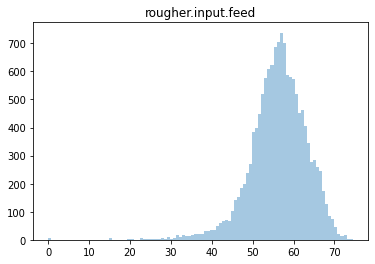

In [36]:
set1 = df_to_train[concentrate['1'][0]]+df_to_train[concentrate['2'][0]]+df_to_train[concentrate['3'][0]]+df_to_train[concentrate['4'][0]]
ax1 = sns.distplot(set1, bins=100, kde=False)
ax1.set_title('rougher.input.feed')

##### Вывод: в обучающей выборке есть несколько значений с около нулевыми показателями, которые надо удалить.

### Нахождение около-нулевых значений в df_to_train и их удаление.

In [37]:
check = df_to_train['rougher.input.feed_ag']+df_to_train['rougher.input.feed_au']+df_to_train['rougher.input.feed_pb']+df_to_train['rougher.input.feed_sol']
check = pd.Series(check)
check.value_counts().sort_index()

0.040000     5
3.714396     1
6.424471     1
8.217984     1
8.429133     1
            ..
73.668306    1
73.795126    1
74.336561    1
74.428550    1
74.458253    1
Length: 13892, dtype: int64

In [38]:
df_to_train = df_to_train.loc[check > 0.05]

##### Результат: df_to_train очищена от выбросов.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах в test выборке.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'rougher.input.feed')

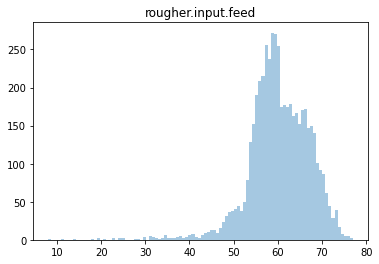

In [39]:
set1 = df_test[concentrate['1'][0]]+df_test[concentrate['2'][0]]+df_test[concentrate['3'][0]]+df_test[concentrate['4'][0]]
ax1 = sns.distplot(set1, bins=100, kde=False)
ax1.set_title('rougher.input.feed')

##### Вывод: в тествой выборке присутствует большое количество нулевых показателей концентрации веществ. Требуется их удалить.

### Нахождение около-нулевых значений в df_test и их удаление.

In [40]:
check_test = df_test['rougher.input.feed_ag']+df_test['rougher.input.feed_au']+df_test['rougher.input.feed_pb']+df_test['rougher.input.feed_sol']
check_test = pd.Series(check_test)
check_test.value_counts().sort_index()

8.072476     1
10.936233    1
13.976035    1
18.015442    1
19.499847    1
            ..
75.760801    1
76.088616    1
76.100011    1
76.912967    1
76.978947    1
Length: 5170, dtype: int64

In [41]:
df_test = df_test.loc[check_test > 0.01]

##### Результат: df_test очищена от выбросов.

# 3. Модель

### Масштабирование признаков.

In [42]:
cols = ['primary_cleaner.input.depressant','primary_cleaner.input.feed_size','primary_cleaner.input.sulfate',
       'primary_cleaner.input.xanthate','primary_cleaner.state.floatbank8_a_air','primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air','primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air','primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air','primary_cleaner.state.floatbank8_d_level',
       'rougher.input.feed_ag','rougher.input.feed_au', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size','rougher.input.feed_sol',
       'rougher.input.floatbank10_sulfate','rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate','rougher.input.floatbank11_xanthate',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air','secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air','secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air','secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air','secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air','secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air','secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air','secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air','secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air','secondary_cleaner.state.floatbank6_a_level']

In [43]:
scaler = StandardScaler()
df_to_train[cols] = scaler.fit_transform(df_to_train[cols])
df_test[cols] = scaler.fit_transform(df_test[cols])

### Функция вычисления sMAPE для rougher.

In [44]:
def smape_rougher(target_rougher, predictions_rougher):
    predictions_rougher = pd.Series(predictions_rougher)
    target_rougher = target_rougher.reset_index(drop=True)
#    predictions_rougher = pd.Series(predictions_rougher, index=target_rougher.index)
    smape_rougher = 1/len(target_rougher)*np.sum((abs(target_rougher-predictions_rougher)/((abs(target_rougher)+abs(predictions_rougher))/2))*100)
    return smape_rougher

### Функция вычисления sMAPE для final.

In [45]:
def smape_final(target_final, predictions_final):
    predictions_final = pd.Series(predictions_final)
    target_final = target_final.reset_index(drop=True)
#    predictions_final = pd.Series(predictions_final, index=target_final.index)
    smape_final = 1/len(target_final)*np.sum((abs(target_final-predictions_final)/((abs(target_final)+abs(predictions_final))/2))*100)
    return smape_final

### Функция вычисления итоговой sMAPE.

In [46]:
def total_smape(smape_rougher, smape_final):
    total_smape = 0.25*smape_rougher+0.75*smape_final
    return total_smape

### Создание функции оценки моделей с помощью make_scorer.

In [47]:
my_scorer_cv = make_scorer(smape_rougher, greater_is_better=True)

### Подготовка параметров для GridSearchCV

In [48]:
model_params = {
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=12345),
        'params' : {
            'splitter': ['best', 'random'],
            'max_depth': [10,20,50,80,100,120,150,200],
            'min_samples_split': range(2,11)
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=12345),
        'params' : {
            'n_estimators': [20,50,100],
            'max_depth': [5,10,20,50]
        }
    },
    'LinearRegression' : {
        'model': LinearRegression(),
        'params': {
        }
    },
    'GradientBoostingRegressor' : {
        'model': GradientBoostingRegressor(random_state=12345),
        'params': {
            'loss': ['ls','lad','huber','quantile']
        }
    }
}

### Разделение на features_train, target_train_rougher и target_train_final выборки.

In [49]:
features_train = df_to_train.drop(['date','final.output.recovery','rougher.output.recovery'],axis=1).reset_index(drop=True)
target_train_rougher = df_to_train['rougher.output.recovery'].reset_index(drop=True)
target_train_final = df_to_train['final.output.recovery'].reset_index(drop=True)

### Разделение на features_test, target_test_rougher и target_test_final выборки.

In [50]:
features_test = df_test.drop(['date','final.output.recovery','rougher.output.recovery'],axis=1).reset_index(drop=True)
target_test_rougher = df_test['rougher.output.recovery'].reset_index(drop=True)
target_test_final = df_test['final.output.recovery'].reset_index(drop=True)

### Нахождение лучшей модели с помощью GridSearchCV.

In [51]:
#scores = pd.DataFrame()
#
#for model_name, mp in model_params.items():
#    rm =  GridSearchCV(mp['model'], mp['params'],scoring=my_scorer_cv, cv=3, n_jobs=-1, return_train_score=False)
#    rm.fit(features_train, target_train_rougher)
#    tech_var = pd.DataFrame(columns=['model'])
#    tech_var = pd.concat([tech_var, pd.DataFrame(rm.cv_results_)])
#    tech_var['model']=model_name
#    scores = pd.concat([scores,tech_var],ignore_index=True)

In [52]:
#scores.sort_values('mean_test_score',ascending=True)

### Вывод:
Лучший результат на GridSearchCV показала модель RandomForestRegressor(n_estimators=100, max_depth=5).

In [53]:
#model_parameters = {
#    'GradientBoostingRegressor' : {
#        'model': GradientBoostingRegressor(random_state=12345),
#        'params': {
#            'loss': ['ls','lad','huber','quantile'],
#            'n_estimators': [100,150,200],
#            'min_samples_split': [2,3,5],
#            'min_samples_leaf': [1,3,6],
#            'max_depth': [3,10,30]
#        }
#    }
#}

In [54]:
#scores = pd.DataFrame()
#
#for model_name, mp in model_parameters.items():
#    rm =  GridSearchCV(mp['model'], mp['params'],scoring=my_scorer_cv, cv=2, n_jobs=-1, return_train_score=False)
#    rm.fit(features_train, target_train_rougher)
#    tech_var = pd.DataFrame(columns=['model'])
#    tech_var = pd.concat([tech_var, pd.DataFrame(rm.cv_results_)])
#    tech_var['model']=model_name
#    scores = pd.concat([scores,tech_var],ignore_index=True)

In [55]:
#scores.sort_values('mean_test_score',ascending=True)

##### Результат: наилучшие параметры GradientBoostingRegressor: loss='quantile', max_depth=10.

### Выбор лучшей модели с помощью кросс-валидации.

In [56]:
#to_validate = {
#    'GradientBoostingRegressor': GradientBoostingRegressor(loss='quantile', max_depth=10,random_state=12345),
#    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=12345),
#    'LinearRegression': LinearRegression(),
#    'DecisionTreeRegressor': DecisionTreeRegressor(splitter='random',min_samples_split=8,max_depth=10,random_state=12345)
#}

In [57]:
#for model_name,model in to_validate.items():
#    score_rougher = cross_val_score(model, features_train, target_train_rougher, cv=3,scoring=my_scorer_cv).mean()
#    score_final = cross_val_score(model, features_train, target_train_final, cv=3,n_jobs=-1,scoring=my_scorer_cv).mean()
#    print('Модель:',model_name)
#    print('sMAPE для rougher:', score_rougher)
#    print('sMAPE для final:', score_final)
#    print('Итоговое sMAPE:', total_smape(score_rougher, score_final),'\n','\n')

Модель: GradientBoostingRegressor
sMAPE для rougher: 9.628799606159864
sMAPE для final: 13.336526447949106
Итоговое sMAPE: 12.409594737501797 
 

Модель: RandomForestRegressor
sMAPE для rougher: 12.592115720413064
sMAPE для final: 10.689360567614498
Итоговое sMAPE: 11.165049355814139 
 

Модель: LinearRegression
sMAPE для rougher: 11.241594001270764
sMAPE для final: 13.125626868962293
Итоговое sMAPE: 12.65461865203941 
 

Модель: DecisionTreeRegressor
sMAPE для rougher: 36.82548224280882
sMAPE для final: 13.38641585201723
Итоговое sMAPE: 19.24618244971513 
 



### Лучшая модель - RandomForestRegressor(n_estimators=100, max_depth=5, random_state=12345).

### Проверка лучшей модели на тестовой выборке.

In [58]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=12345)
score_rougher = cross_val_score(rfr, features_test, target_test_rougher, cv=3,scoring=my_scorer_cv).mean()
score_final = cross_val_score(rfr, features_test, target_test_final, cv=3,n_jobs=-1,scoring=my_scorer_cv).mean()
print('sMAPE для rougher:', score_rougher)
print('sMAPE для final:', score_final)
print('Итоговое sMAPE:', total_smape(score_rougher, score_final),'\n','\n')

sMAPE для rougher: 6.708905687487224
sMAPE для final: 9.002648231153968
Итоговое sMAPE: 8.429212595237281 
 



### На всякий случай, проверяю вторую по показателям модель GradientBoostingRegressor.

In [59]:
gbr = GradientBoostingRegressor(loss='quantile', max_depth=10,random_state=12345)
score_rougher = cross_val_score(gbr, features_test, target_test_rougher, cv=3,scoring=my_scorer_cv).mean()
score_final = cross_val_score(gbr, features_test, target_test_final, cv=3,n_jobs=-1,scoring=my_scorer_cv).mean()
print('sMAPE для rougher:', score_rougher)
print('sMAPE для final:', score_final)
print('Итоговое sMAPE:', total_smape(score_rougher, score_final),'\n','\n')

sMAPE для rougher: 5.49775858111201
sMAPE для final: 10.88633772589634
Итоговое sMAPE: 9.539192939700257 
 



### Построение константной модели по медиане для сравнения.

In [60]:
gbr_rougher = GradientBoostingRegressor(loss='quantile', max_depth=10,random_state=12345).fit(features_train,target_train_rougher)
gbr_final = GradientBoostingRegressor(loss='quantile', max_depth=10,random_state=12345).fit(features_train,target_train_final)
rfr_rougher = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=12345).fit(features_train,target_train_rougher)
rfr_final = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=12345).fit(features_train,target_train_final)

In [61]:
answers_gbr_rougher = gbr_rougher.predict(features_test)
answers_gbr_final = gbr_final.predict(features_test)
answers_rfr_rougher = rfr_rougher.predict(features_test)
answers_rfr_final = rfr_final.predict(features_test)

In [62]:
temp=pd.DataFrame()
temp['target_rougher'] = target_test_rougher
temp['target_final'] = target_test_final
temp['median_rougher'] = target_test_rougher.median()
temp['median_final'] = target_test_final.median()
temp['answers_gbr_rougher'] = answers_gbr_rougher
temp['answers_gbr_final'] = answers_gbr_final
temp['answers_rfr_rougher'] = answers_rfr_rougher
temp['answers_rfr_final'] = answers_rfr_final
temp['smape_gbr_rougher'] = (abs(temp['target_rougher']-temp['answers_gbr_rougher'])/((abs(temp['target_rougher'])+abs(temp['answers_gbr_rougher']))/2))*100
temp['smape_rfr_rougher'] = (abs(temp['target_rougher']-temp['answers_rfr_rougher'])/((abs(temp['target_rougher'])+abs(temp['answers_rfr_rougher']))/2))*100
temp['smape_gbr_final'] = (abs(temp['target_final']-temp['answers_gbr_final'])/((abs(temp['target_final'])+abs(temp['answers_gbr_final']))/2))*100
temp['smape_rfr_final'] = (abs(temp['target_final']-temp['answers_rfr_final'])/((abs(temp['target_final'])+abs(temp['answers_rfr_final']))/2))*100
temp.head()

,target_rougher,target_final,median_rougher,median_final,answers_gbr_rougher,answers_gbr_final,answers_rfr_rougher,answers_rfr_final,smape_gbr_rougher,smape_rfr_rougher,smape_gbr_final,smape_rfr_final
0,89.993421,70.273583,87.457953,69.98349,92.299033,77.219254,81.229077,70.548935,2.529575,10.237374,9.418317,0.391063
1,88.089657,68.910432,87.457953,69.98349,91.825109,76.936837,81.041384,69.974459,4.152469,8.334689,11.006590,1.532243
2,88.412756,68.143213,87.457953,69.98349,91.377220,75.873890,81.041384,70.067775,3.297697,8.700138,10.735776,2.784962
3,87.360133,67.776393,87.457953,69.98349,91.072848,74.613492,81.041384,69.640120,4.161467,7.504386,9.603350,2.712523
4,83.236367,61.467078,87.457953,69.98349,88.873043,76.331109,80.101456,69.781674,6.550107,3.838562,21.573623,12.669980


### Вычисление sMAPE вручную

In [63]:
total_gbr_smape_rougher = 0.25*sum(temp['smape_gbr_rougher'])/len(temp['smape_gbr_rougher'])+0.75*sum(temp['smape_gbr_final'])/len(temp['smape_gbr_final'])
total_rfr_smape_final = 0.25*sum(temp['smape_rfr_rougher'])/len(temp['smape_rfr_rougher'])+0.75*sum(temp['smape_rfr_final'])/len(temp['smape_rfr_final'])
print('Итоговое sMAPE GBR:', total_gbr_smape_rougher)
print('Итоговое sMAPE RFR:', total_rfr_smape_final)

Итоговое sMAPE GBR: 8.76810098344179
Итоговое sMAPE RFR: 9.404754197433233


##### sMAPE сошлось, вычисления правильные.

### Вычисление sMAPE для константной модели по функции.

In [64]:
score_rougher = smape_rougher(temp['target_rougher'], temp['median_rougher'])
score_final = smape_final(temp['target_final'], temp['median_final'])
print('sMAPE для rougher:', score_rougher)
print('sMAPE для final:', score_final)
print('Итоговое sMAPE:', total_smape(score_rougher, score_final),'\n','\n')

sMAPE для rougher: 5.156651036011569
sMAPE для final: 7.58817508246967
Итоговое sMAPE: 6.980294070855145 
 



### Константная модель оказалась намного лучше.

### Проверка моделей без кросс-валидации с обучением на train и предсказанием на test.

### GradientBoostingRegressor

In [65]:
score_rougher = smape_rougher(target_test_rougher,answers_gbr_rougher)
score_final = smape_final(target_test_final,answers_gbr_final)
print('sMAPE для rougher:', score_rougher)
print('sMAPE для final:', score_final)
print('Итоговое sMAPE:', total_smape(score_rougher, score_final),'\n','\n')

sMAPE для rougher: 5.179611542251627
sMAPE для final: 9.964264130505189
Итоговое sMAPE: 8.768100983441798 
 



### RandomForestRegressor

In [66]:
score_rougher = smape_rougher(target_test_rougher,answers_rfr_rougher)
score_final = smape_final(target_test_final,answers_rfr_final)
print('sMAPE для rougher:', score_rougher)
print('sMAPE для final:', score_final)
print('Итоговое sMAPE:', total_smape(score_rougher, score_final),'\n','\n')

sMAPE для rougher: 10.505633566724336
sMAPE для final: 9.037794407669539
Итоговое sMAPE: 9.404754197433238 
 



# Достичь точности предсказаний константной модели не удалось. Это говорит о том, что распределение правильных ответов в target очень узкое.

### Посмотрим на распределение значений target_rougher и target_final.

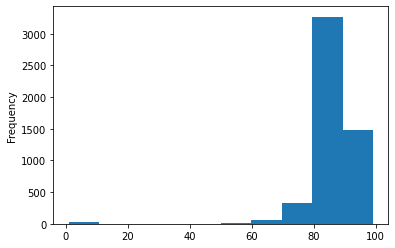

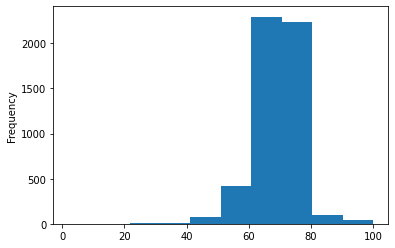

In [67]:
temp['target_rougher'].plot(kind='hist')
plt.show()
temp['target_final'].plot(kind='hist')
plt.show()

In [69]:
temp[['target_final','target_rougher']].describe()

,target_final,target_rougher
count,5177.000000,5177.000000
mean,69.112474,86.304096
std,7.372991,8.004869
min,2.030917,1.011452
25%,65.811684,84.711356
50%,69.983490,87.457953
75%,73.337229,89.773220
max,100.000000,99.169699


### Видно, что распределение, действительно, очень узкое. Разность между третьим и первым квантилем для final - 7,525545, для rougher - 5,061864. Поэтому константная модель показывает лучший результат, чем модель машинного обучения.

##### Выводы:
1. Была проведена предобработка входных данных.
2. В тренировочную и тестовую выборки были добавлены целевые признаки.
3. Было проведено заполнение недостающих данных по имеющимся признакам.
4. Проведён поиск лучшей модели с помощью GridSearchCV, а также перебором параметров с помощью цикла.
5. Найдены наилучшие модели.
6. Лучшая модель проверена на тестовой выборке.
7. Получено лучшее значение итоговой sMAPE = 8.429212595237281.
8. Значение метрики sMAPE константной модели = 6.980294070855145.
9. Константная модель показывает лучший результат из-за узкого распределения значений в target.